In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import sys

# MINST Dataset

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]

In [4]:
X.shape, y.shape

((70000, 784), (70000,))

mnist => is 784 = 28*28 pixel

In [5]:
type(X)

pandas.core.frame.DataFrame

5


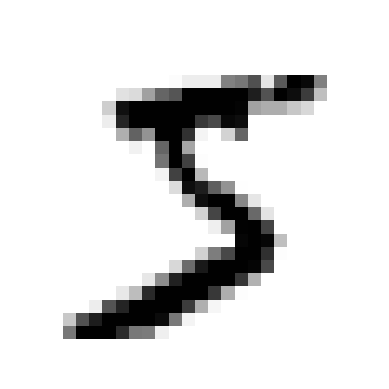

In [6]:
some_digit = X.iloc[0].values.reshape(28, -1)
plt.imshow(some_digit, cmap="binary")
plt.axis("off")
print(y[0])

In [7]:
type(y)

pandas.core.series.Series

In [8]:
# y => is categories list
# let's convert it to numbers
y = y.astype(np.uint8)
# MINST Is already splitted into train (6000), test
X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]

**it's already shuffled** => some training algorithms is sensetive if get simialr examples in row

# Binary Classifier

In [9]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [10]:
# Stochastic (randomness) Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42) # set random state to reproducible results because it's higly depend on it
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

# Performance Measures
measure performance for classifiers is much trickier than regression


## Measuring Accuracy Using Cross-Validation


In [15]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    X_train_fold, y_train_fold = X_train.iloc[train_index], y_train_5.iloc[train_index]
    X_test_fold, y_test_fold = X_train.iloc[test_index], y_train_5.iloc[test_index]

    clone_clf = clone(sgd_clf)
    clone_clf.fit(X_train_fold, y_train_fold)

    y_pred = clone_clf.predict(X_test_fold)
    n_correct = np.sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9669
0.91625
0.96785


In [17]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

**Actually:** if We only predict _zeros_ we will get more than 90% accuracy
because dataset is biased

## Confusion Matrix

In [19]:
# lets get cross-validation predication
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)


In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred) # y_true, y_pred
# return => True_negative, False_positive, false negative, true positive

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [21]:
y_train_perfect_pred = y_train_5
confusion_matrix(y_train_5, y_train_perfect_pred)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

### Two meertices to understand more:
1. **Precision** (accuracy of positive predications)
    > we can maxmize percision by just predict one sample true as true and give all others as zero 

   $$ \text{precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
   $$

2. **Recall** (senstivity)(TRP (true positive rate))
   > percentage of true positive instances that predicted correctly
   
   $$ \text{recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
   $$
![confusionMatrix](./imgs/confusionMatrix.png)

## Precision & Recall

In [22]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))

0.8370879772350012
0.6511713705958311


can combine two in one metric __F1 Score__ where it express haramonic mean of precision and recall. \
difference between _mean_ and _haramonic mean_ is mean give equal weight to all __but__  haramonic mean give much more wieght to low value

$$
F_1 = \frac{2}{\frac{1}{precision} + \frac{1}{recall}} 
$$
\
\
$$
F_1 = 2 \frac{precision * recall}{precision + recall}
$$
\
\
$$
F_1 = \frac{TP}{TP + \frac{FN + FP}{2}}
$$

In [23]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343847